Mount the Drive

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the Dataset

In [2]:
import pandas as pd 
import time
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Data/final_data.csv', index_col=0)   #Change Path to your Drive Directory accordingly.
data = data.drop(['address'],axis = 1)
data["label"]= data["label"].replace(28, "white") 
data["label"]= data["label"].replace('28', "white") 
classes = data.label.unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(data.head())
print(data.tail())
print(data.describe())
print(data.info())

   year  day  length    weight  ...  looped  neighbors       income            label
0  2017   11      18  0.008333  ...       0          2  100050000.0  princetonCerber
1  2016  132      44  0.000244  ...       0          1  100000000.0   princetonLocky
2  2016  246       0  1.000000  ...       0          2  200000000.0  princetonCerber
3  2016  322      72  0.003906  ...       0          2   71200000.0  princetonCerber
4  2016  238     144  0.072848  ...       0          1  200000000.0   princetonLocky

[5 rows x 9 columns]
        year  day  length    weight  ...  looped  neighbors        income  label
315195  2018  330       0  0.111111  ...       0          2  2.503180e+09  white
315196  2018  330       0  0.500000  ...       0          2  1.000000e+09  white
315197  2018  330       6  0.020092  ...       0          1  3.000000e+08  white
315198  2018  330       0  0.333333  ...       0          2  1.372746e+09  white
315199  2018  330       6  1.000000  ...       0          2  2.

In [6]:
data=data.replace('white','White')
data=data.replace('paduaCryptoWall','CryptoWall')
data=data.replace('montrealCryptoLocker','CryptoLocker')
data=data.replace('princetonCerber','Cerber')
data=data.replace('princetonLocky','Locky')
data=data.replace('montrealCryptXXX','CryptXXX')
data=data.replace('montrealNoobCrypt','NoobCrypt')
data=data.replace('montrealDMALockerv3','DMA Lockerv3')
data=data.replace('montrealDMALocker','DMA Locker')
data=data.replace('montrealSamSam','SamSam')
data=data.replace('montrealCryptoTorLocker2015','CryptoTorLocker2015')
data=data.replace('montrealGlobeImposter','GlobeImposter')
data=data.replace('montrealGlobev3','Globev3')
data=data.replace('montrealGlobe','Globe')
data=data.replace('montrealWannaCry','WannaCry')
data=data.replace('montrealRazy','Razy')
data=data.replace('montrealAPT','APT')
data=data.replace('paduaKeRanger','KeRanger')
data=data.replace('montrealFlyper','Flyper')
data=data.replace('montrealXTPLocker','XTP Locker')
data=data.replace('montrealVenusLocker','Venus Locker')
data=data.replace('montrealCryptConsole','CryptConsole')
data=data.replace('montrealXLockerv5.0','XLockerv5')
data=data.replace('montrealEDA2','EDA2')
data=data.replace('montrealJigSaw','Montreal - JigSaw')
data=data.replace('paduaJigsaw','Padua - Jigsaw')
data=data.replace('montrealXLocker','XLocker')
data=data.replace('montrealSam','Sam')
data=data.replace('montrealComradeCircle','Comrade Circle')

In [7]:
data = data[(data.label != 'XLocker') & (data.label != 'Comrade Circle') & (data.label != 'Sam')]
print(data)

        year  day  length    weight  ...  looped  neighbors        income   label
0       2017   11      18  0.008333  ...       0          2  1.000500e+08  Cerber
1       2016  132      44  0.000244  ...       0          1  1.000000e+08   Locky
2       2016  246       0  1.000000  ...       0          2  2.000000e+08  Cerber
3       2016  322      72  0.003906  ...       0          2  7.120000e+07  Cerber
4       2016  238     144  0.072848  ...       0          1  2.000000e+08   Locky
...      ...  ...     ...       ...  ...     ...        ...           ...     ...
315195  2018  330       0  0.111111  ...       0          2  2.503180e+09   White
315196  2018  330       0  0.500000  ...       0          2  1.000000e+09   White
315197  2018  330       6  0.020092  ...       0          1  3.000000e+08   White
315198  2018  330       0  0.333333  ...       0          2  1.372746e+09   White
315199  2018  330       6  1.000000  ...       0          2  2.397816e+09   White

[315194 rows x 

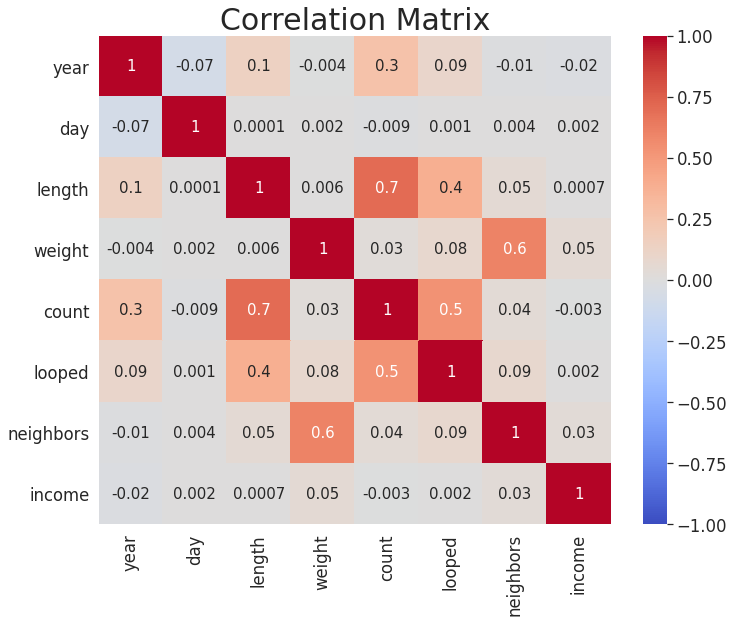

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10.7,9)})
corrMatrix = data.corr()
sns.set(font_scale=1.5)
sns.heatmap(corrMatrix, annot=True, fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='coolwarm',annot_kws={"size":15})
plt.title('Correlation Matrix', fontsize = 30)
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/Correlation Matrix.png',dpi=700)
plt.show()

In [9]:
print('Value Counts:\n',data['label'].value_counts())
print('Total labels: ',len(data['label'].unique()))

Value Counts:
 White                  232374
CryptoWall              24780
CryptoLocker            18630
Cerber                  18446
Locky                   13250
CryptXXX                 4838
NoobCrypt                 966
DMA Lockerv3              708
DMA Locker                502
SamSam                    124
GlobeImposter             110
CryptoTorLocker2015       110
Globev3                    68
Globe                      64
WannaCry                   56
Razy                       26
APT                        22
KeRanger                   20
Flyper                     18
XTP Locker                 16
CryptConsole               14
Venus Locker               14
XLockerv5                  14
EDA2                       12
Montreal - JigSaw           8
Padua - Jigsaw              4
Name: label, dtype: int64
Total labels:  26


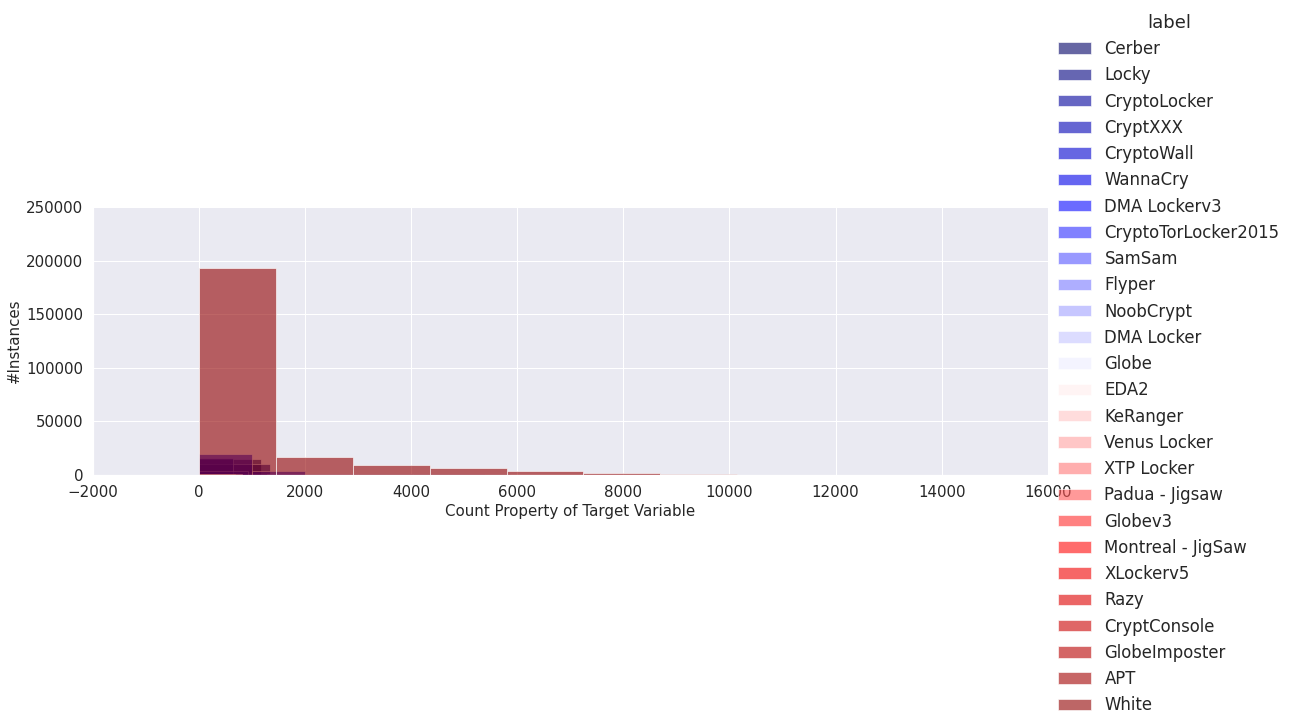

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
facet = sns.FacetGrid(data, hue='label',height=5,aspect=3,palette='seismic')
facet.map(plt.hist,'count',bins=10,alpha=0.6)
#facet.set(xlim=(0,data.length.max()))
facet.set_xticklabels(fontsize=15)
facet.set_yticklabels(fontsize=15)
facet.set_xlabels('Count Property of Target Variable',fontsize=15)
facet.set_ylabels('#Instances',fontsize=15)
facet.add_legend()

Log Transformations , Run only once :)

In [11]:
import numpy as np
eps = 0.001
data['income'] = np.log(data.pop('income')+eps)
data['weight'] = np.log(data.pop('weight')+eps)
data['count'] = np.log(data.pop('count')+eps)
data['looped'] = np.log(data.pop('looped')+eps)
data['neighbors'] = np.log(data.pop('neighbors')+eps)
data['length'] = np.log(data.pop('length')+eps)
data['day'] = np.log(data.pop('day')+eps)

print(data['length'].min())
print(data['length'].max())
print(data['count'].min())
print(data['count'].max())
print(data.looped.min())
print(data.looped.max())
print(data.neighbors.min())
print(data.neighbors.max())
print(data.income.min())
print(data.income.max())
print(data.weight.min())
print(data.weight.max())

-6.907755278982137
4.969820243996333
0.0009995003330834232
9.581628097267306
-6.907755278982137
9.581628097267306
0.0009995003330834232
7.340836202631495
17.216707939659763
31.536556508367305
-6.907755278982137
6.211181285295772


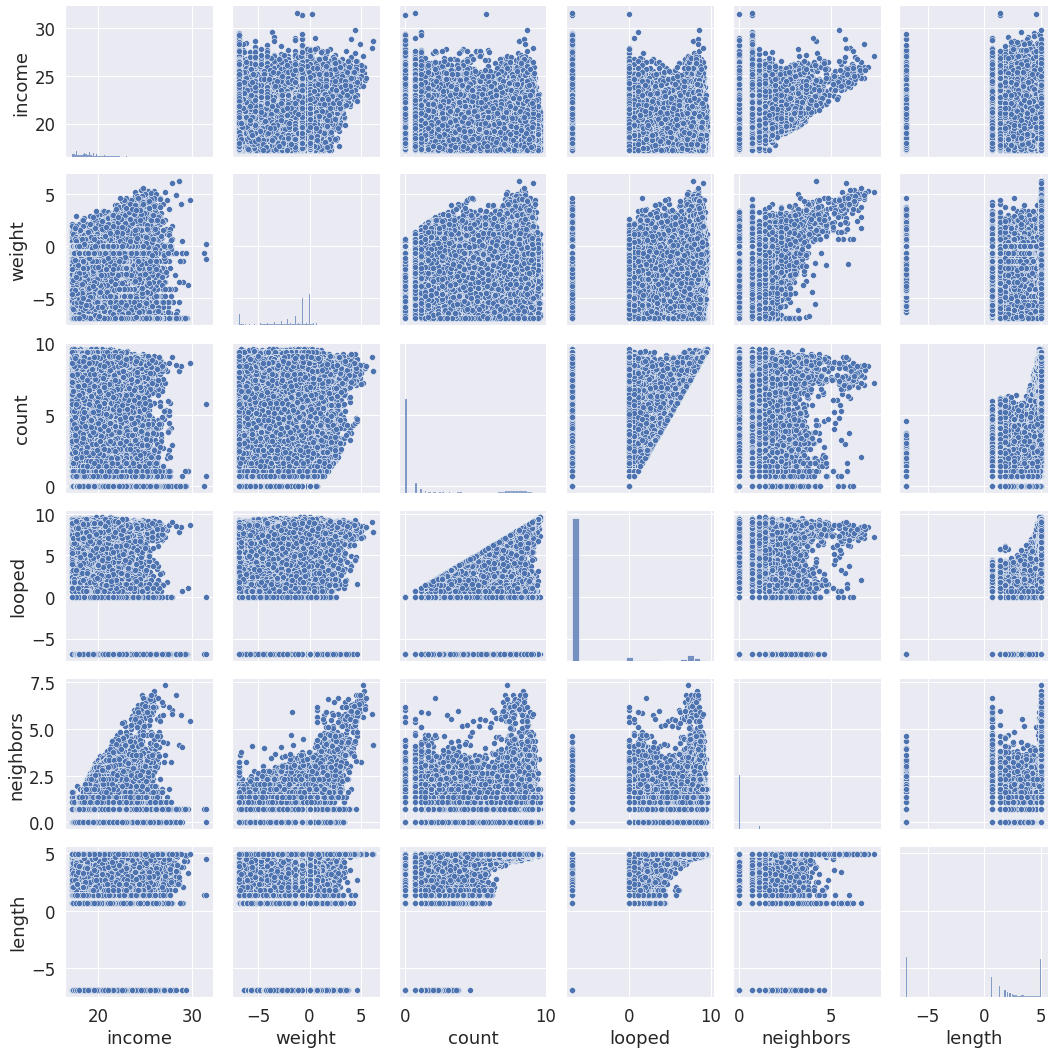

In [13]:
feats = ['label', 'income', 'weight', 'count', 'looped', 'neighbors','length']
#sns.pairplot(data[feats],height=2.5,hue="label")
#sns.pairplot(data[feats],height=2.5,kind="kde")
sns.pairplot(data[feats],height=2.5)
plt.show()

In [14]:
col_names = ['year', 'income', 'weight', 'count', 'looped', 'neighbors', 'length', 'day']
features = data[col_names]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ct = ColumnTransformer([('somename', MinMaxScaler(), ['year', 'income', 'weight', 'count', 'looped', 'neighbors', 'length', 'day'])], remainder='passthrough')
data = ct.fit_transform(data)

In [15]:
data = pd.DataFrame(data, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income', 'label'])
print(data)

            year        day     length  ... neighbors    income   label
0       0.857143  0.0841121   0.170257  ...  0.824931  0.406345  Cerber
1       0.714286  0.0840772  0.0166511  ...  0.900181   0.82758   Locky
2       0.714286   0.132482   0.526625  ...         0  0.933112  Cerber
3       0.714286  0.0603565   0.121238  ...  0.941643  0.978751  Cerber
4       0.714286   0.132482   0.327924  ...         1  0.927508   Locky
...          ...        ...        ...  ...       ...       ...     ...
315189         1    0.30895   0.359746  ...         0  0.982911   White
315190         1   0.244874   0.473865  ...         0  0.982911   White
315191         1   0.160797   0.232406  ...  0.732446  0.982911   White
315192         1   0.266998   0.443034  ...         0  0.982911   White
315193         1   0.305947   0.526625  ...  0.732446  0.982911   White

[315194 rows x 9 columns]


In [16]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
data['label'] = le2.fit_transform(data['label'])
data['label'].unique()
print(le2.classes_)

labels = le2.inverse_transform(data['label'])
len(data.label.unique())

['APT' 'Cerber' 'CryptConsole' 'CryptXXX' 'CryptoLocker'
 'CryptoTorLocker2015' 'CryptoWall' 'DMA Locker' 'DMA Lockerv3' 'EDA2'
 'Flyper' 'Globe' 'GlobeImposter' 'Globev3' 'KeRanger' 'Locky'
 'Montreal - JigSaw' 'NoobCrypt' 'Padua - Jigsaw' 'Razy' 'SamSam'
 'Venus Locker' 'WannaCry' 'White' 'XLockerv5' 'XTP Locker']


26

In [17]:
X = data.loc[:, data.columns != 'label']
y = data['label']

Split the dataset into train and test set with stratify (80-20)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2020, stratify=y, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [19]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252155
63039
252155
63039


In [21]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(learning_rate = 0.1, max_depth = 9, min_child_weight = 1, n_estimators = 1850, nthread = 4, silent = 1, subsample = 1, tree_method = 'gpu_hist')
# Add silent=True to avoid printing out updates with each cycle
model_xgb.fit(np.array(X_train), np.array(y_train), verbose=2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=1850, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=1, subsample=1, tree_method='gpu_hist', verbosity=1)

In [22]:
predictions = model_xgb.predict(np.array(X_test))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, predictions) 
acc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions,average='weighted')
recall = recall_score(y_test, predictions,average='weighted')
precision = precision_score(y_test, predictions,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  0.852043972778756
Accuracy:  0.9513475784831612
Recall:  0.9513475784831612
Precision:  0.952761051845621
F1-score:  0.9516853397696341


In [24]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, predictions, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.908689  0.946869  0.927386   3689.000000
CryptConsole          0.750000  1.000000  0.857143      3.000000
CryptXXX              0.966463  0.982438  0.974385    968.000000
CryptoLocker          0.835899  0.859903  0.847731   3726.000000
CryptoTorLocker2015   0.833333  0.909091  0.869565     22.000000
CryptoWall            0.862369  0.960856  0.908952   4956.000000
DMA Locker            0.843373  0.700000  0.765027    100.000000
DMA Lockerv3          0.822695  0.816901  0.819788    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                0.500000  0.250000  0.333333      4.000000
Globe                 0.916667  0.846154  0.880000     13.000000
GlobeImposter         0.944444  0.772727  0.850000     22.000000
Globev3               0.916667  0.785714  0.846154     14.000000
KeRanger              1.0

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc = ExtraTreesClassifier(max_features='log2',min_samples_split=3)
model_etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [26]:
predictions = model_etc.predict(np.array(X_test))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, predictions) 
acc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions,average='weighted')
recall = recall_score(y_test, predictions,average='weighted')
precision = precision_score(y_test, predictions,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  0.8440171957042466
Accuracy:  0.9509034090007773
Recall:  0.9509034090007773
Precision:  0.9521720565847646
F1-score:  0.9512007388363052


In [27]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, predictions, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_etc = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_etc)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.900544  0.942532  0.921060   3689.000000
CryptConsole          0.750000  1.000000  0.857143      3.000000
CryptXXX              0.959225  0.972107  0.965623    968.000000
CryptoLocker          0.858303  0.879495  0.868770   3726.000000
CryptoTorLocker2015   1.000000  0.818182  0.900000     22.000000
CryptoWall            0.864029  0.947538  0.903859   4956.000000
DMA Locker            0.922078  0.710000  0.802260    100.000000
DMA Lockerv3          0.915254  0.760563  0.830769    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                1.000000  0.500000  0.666667      4.000000
Globe                 0.916667  0.846154  0.880000     13.000000
GlobeImposter         0.900000  0.818182  0.857143     22.000000
Globev3               1.000000  0.785714  0.880000     14.000000
KeRanger              1.0

In [28]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 250, n_jobs=-1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
predictions = model_rf.predict(np.array(X_test))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, predictions) 
acc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions,average='weighted')
recall = recall_score(y_test, predictions,average='weighted')
precision = precision_score(y_test, predictions,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  0.8531861228763147
Accuracy:  0.9508716826091784
Recall:  0.9508716826091784
Precision:  0.9526974263388317
F1-score:  0.9513134668685864


In [30]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, predictions, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.898201  0.947140  0.922021   3689.000000
CryptConsole          1.000000  1.000000  1.000000      3.000000
CryptXXX              0.966258  0.976240  0.971223    968.000000
CryptoLocker          0.843272  0.888084  0.865098   3726.000000
CryptoTorLocker2015   1.000000  0.818182  0.900000     22.000000
CryptoWall            0.857323  0.957829  0.904794   4956.000000
DMA Locker            0.887500  0.710000  0.788889    100.000000
DMA Lockerv3          0.880000  0.774648  0.823970    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                1.000000  0.500000  0.666667      4.000000
Globe                 1.000000  0.846154  0.916667     13.000000
GlobeImposter         1.000000  0.818182  0.900000     22.000000
Globev3               1.000000  0.785714  0.880000     14.000000
KeRanger              1.0

Variational AE on entire dataset

In [31]:
y = pd.DataFrame(y)
y.reset_index(inplace=True, drop=True)
X.reset_index(inplace=True, drop=True)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [33]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [34]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], code_size),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))    #8
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)   #6
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)    #5
z_mean = Dense(code_size)(hidden_1) #4
z_log_sigma = Dense(code_size)(hidden_1)    
z = Lambda(sampling)([z_mean, z_log_sigma]) 

# Create encoder
encoder = Model(input_feats, [z_mean, z_log_sigma, z], name='encoder')
encoder.summary()

decoder_input = Input(shape=(code_size), name='z_sampling')
hidden_2 = Dense(hidden_size-1, activation='relu')(decoder_input)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

decoder = Model(decoder_input, output_feats, name='decoder')
decoder.summary()

# instantiate VAE model
output_feats = decoder(encoder(input_feats)[2])
vae = keras.Model(input_feats, output_feats, name='vae_mlp')

reconstruction_loss = keras.losses.binary_crossentropy(input_feats, output_feats)
reconstruction_loss *= input_size
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]
baseline_history = vae.fit( X_train,
                            X_train,    #Semi Supervised
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 6)            54          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            35          dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 4)            24          dense_1[0][0]                    
____________________________________________________________________________________________

In [35]:
y_test.reset_index(inplace=True, drop=True)
y_test

,label
0,23
1,23
2,6
3,23
4,3
...,...
63034,4
63035,23
63036,23
63037,1


In [36]:
vae_pred = vae.predict(X_test)
vae_pred

array([[0.9671348 , 0.08718623, 0.40504593, ..., 0.06460451, 0.75666696,
        0.56761223],
       [0.61445206, 0.15644626, 0.29553753, ..., 0.12084033, 0.9954448 ,
        0.88199717],
       [0.72350293, 0.12053005, 0.45904467, ..., 0.05758764, 0.11993938,
        0.82861525],
       ...,
       [0.75199264, 0.11132954, 0.3577107 , ..., 0.06891499, 0.81069595,
        0.92345834],
       [0.59742457, 0.16449201, 0.33140332, ..., 0.12710008, 0.9897804 ,
        0.87218714],
       [0.62071836, 0.13312323, 0.28981483, ..., 0.07198227, 0.9825554 ,
        0.8952846 ]], dtype=float32)

In [37]:
print(np.round(vae_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(vae_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(vae_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

[0.72 0.12 0.46 0.   0.   0.06 0.12 0.83]
[0.57 0.12 0.53 0.   0.   0.   0.   0.67]

[0.06 0.24 0.38 0.04 0.22 0.09 0.57 0.94]
[0.   0.14 0.48 0.07 0.42 0.   0.73 0.79]

[0.51 0.2  0.34 0.8  0.84 0.16 0.99 0.77]
[0.43 0.09 0.2  0.77 0.86 0.09 1.   0.87]


In [38]:
vae_pred = pd.DataFrame(vae_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [39]:
vae_pred["label"] = y_test.values
# vae_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/VAE_pred.csv')

AE on entire dataset

In [40]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [41]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]
baseline_history_2 = autoencoder.fit(X_train,
                                    X_train,
                                    batch_size=BATCH_SIZE,
                                    epochs=EPOCHS,
                                    callbacks=callbacks,
                                    validation_data=(X_test, X_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56    

In [42]:
autoencoder_pred = autoencoder.predict(X_test)
autoencoder_pred

array([[9.3752742e-01, 1.1548466e-01, 5.2440929e-01, ..., 9.7764365e-02,
        7.9037321e-01, 5.3789151e-01],
       [5.7370907e-01, 1.6028865e-01, 3.3142623e-01, ..., 9.5831290e-02,
        9.8631358e-01, 7.9977012e-01],
       [5.9892035e-01, 1.3885172e-01, 5.8900774e-01, ..., 5.5356465e-02,
        5.1136810e-04, 7.1102172e-01],
       ...,
       [7.7957261e-01, 9.6391000e-02, 2.4140379e-01, ..., 5.7731796e-02,
        7.8049088e-01, 9.5377254e-01],
       [7.2345084e-01, 1.4039522e-01, 3.1397060e-01, ..., 9.6135065e-02,
        9.9351752e-01, 8.1627935e-01],
       [7.3494387e-01, 1.1615266e-01, 2.1872063e-01, ..., 7.8187674e-02,
        9.9492526e-01, 9.3248427e-01]], dtype=float32)

In [43]:
print(np.round(autoencoder_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(autoencoder_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(autoencoder_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

[0.6  0.14 0.59 0.   0.   0.06 0.   0.71]
[0.57 0.12 0.53 0.   0.   0.   0.   0.67]

[0.06 0.28 0.41 0.08 0.36 0.09 0.67 0.73]
[0.   0.14 0.48 0.07 0.42 0.   0.73 0.79]

[0.41 0.18 0.32 0.81 0.86 0.09 0.98 0.81]
[0.43 0.09 0.2  0.77 0.86 0.09 1.   0.87]


In [45]:
autoencoder_pred = pd.DataFrame(autoencoder_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [46]:
autoencoder_pred["label"] = y_test.values
# autoencoder_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_pred.csv')

##### Ignore below Code 

Import AE & VAE data (generated as whole dataset - 2 NNs)

In [ ]:
ae_pred_whole = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_pred.csv', index_col=0)
vae_pred_whole = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/VAE_pred.csv', index_col=0)

In [ ]:
X_ae = ae_pred.loc[:, ae_pred.columns != 'label']
y_ae = ae_pred['label']
print(X_ae)
print(y_ae)

X_vae = vae_pred.loc[:, vae_pred.columns != 'label']
y_vae = vae_pred['label']
print(X_vae)
print(y_vae)

X_ae_whole = ae_pred_whole.loc[:, ae_pred_whole.columns != 'label']
y_ae_whole = ae_pred_whole['label']
print(X_ae_whole)
print(y_ae_whole)

X_vae_whole = vae_pred_whole.loc[:, vae_pred_whole.columns != 'label']
y_vae_whole = vae_pred_whole['label']
print(X_vae_whole)
print(y_vae_whole)

           year       day    length  ...    looped  neighbors    income
0      0.644952  0.272367  0.470364  ...  0.317759   0.455961  0.585051
1      0.593861  0.402344  0.509944  ...  0.420427   0.469869  0.506797
2      0.703548  0.150120  0.472852  ...  0.206585   0.397946  0.697696
3      0.738520  0.232130  0.424268  ...  0.082293   0.998121  0.889276
4      0.644952  0.272367  0.470364  ...  0.317759   0.455961  0.585051
...         ...       ...       ...  ...       ...        ...       ...
63043  0.214114  0.195417  0.429724  ...  0.085971   0.853599  0.752127
63044  0.441608  0.133398  0.163975  ...  0.087149   0.985804  0.840148
63045  0.715412  0.040241  0.369050  ...  0.089847   0.804976  0.838895
63046  0.713554  0.011348  0.450848  ...  0.087285   0.000080  0.889623
63047  0.713554  0.011348  0.450848  ...  0.087285   0.000080  0.889623

[63048 rows x 8 columns]
0         0
1         0
2         0
3         0
4         0
         ..
63043    23
63044    23
63045    18
63

            year       day    length  ...    looped  neighbors    income
0       0.000000  0.358127  0.427442  ...  0.188771   0.833801  0.722456
1       0.286069  0.180886  0.215964  ...  0.000000   0.775448  0.872451
2       0.000000  0.296294  0.299706  ...  0.000000   0.000000  0.990938
3       0.428997  0.038623  0.404248  ...  0.000000   0.000000  0.983424
4       0.857355  0.084077  0.382492  ...  0.000000   1.000000  0.958652
...          ...       ...       ...  ...       ...        ...       ...
126082  0.214114  0.195417  0.429724  ...  0.085971   0.853599  0.752127
126083  0.441608  0.133398  0.163975  ...  0.087149   0.985804  0.840148
126084  0.715412  0.040241  0.369050  ...  0.089847   0.804976  0.838895
126085  0.713554  0.011348  0.450848  ...  0.087285   0.000080  0.889623
126086  0.713554  0.011348  0.450848  ...  0.087285   0.000080  0.889623

[126087 rows x 8 columns]
0         23
1         23
2         23
3         23
4         23
          ..
126082    23
126083

In [ ]:
whole_ae_pred = model_xgb.predict(np.array(X_whole_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_ae, whole_ae_pred) 
acc = accuracy_score(y_whole_ae, whole_ae_pred)
f1_score = f1_score(y_whole_ae, whole_ae_pred,average='weighted')
recall = recall_score(y_whole_ae, whole_ae_pred,average='weighted')
precision = precision_score(y_whole_ae, whole_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

In [ ]:
whole_vae_pred = model_xgb.predict(np.array(X_whole_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_vae, whole_vae_pred) 
acc = accuracy_score(y_whole_vae, whole_vae_pred)
f1_score = f1_score(y_whole_vae, whole_vae_pred,average='weighted')
recall = recall_score(y_whole_vae, whole_vae_pred,average='weighted')
precision = precision_score(y_whole_vae, whole_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.96656831485271
Accuracy:  0.8180174177889877
Recall:  0.8180174177889877
Precision:  0.8256460275522235
F1-score:  0.8092787053425471


In [ ]:
sep_ae_pred = model_xgb.predict(np.array(X_sep_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_sep_ae, sep_ae_pred) 
acc = accuracy_score(y_sep_ae, sep_ae_pred)
f1_score = f1_score(y_sep_ae, sep_ae_pred,average='weighted')
recall = recall_score(y_sep_ae, sep_ae_pred,average='weighted')
precision = precision_score(y_sep_ae, sep_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.6223321991957933
Accuracy:  0.8439093641691847
Recall:  0.8439093641691847
Precision:  0.8466068122094126
F1-score:  0.834690955175886


In [ ]:
sep_vae_pred = model_xgb.predict(np.array(X_sep_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_sep_vae, sep_vae_pred) 
acc = accuracy_score(y_sep_vae, sep_vae_pred)
f1_score = f1_score(y_sep_vae, sep_vae_pred,average='weighted')
recall = recall_score(y_sep_vae, sep_vae_pred,average='weighted')
precision = precision_score(y_sep_vae, sep_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.360275689223058
Accuracy:  0.8595063608388058
Recall:  0.8595063608388058
Precision:  0.8592483443907551
F1-score:  0.8492589972600253


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_ae, whole_ae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.250000  0.400000       8.000000
Cerber                0.906355  0.473570  0.622096    7378.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.880996  0.493285  0.632450    1936.000000
CryptoLocker          0.814011  0.438137  0.569659    7452.000000
CryptoTorLocker2015   0.814815  0.500000  0.619718      44.000000
CryptoWall            0.645155  0.679782  0.662016    9912.000000
DMA Locker            0.679612  0.350000  0.462046     200.000000
DMA Lockerv3          0.773333  0.408451  0.534562     284.000000
EDA2                  1.000000  0.500000  0.666667       4.000000
Flyper                0.500000  0.125000  0.200000       8.000000
Globe                 0.916667  0.423077  0.578947      26.000000
GlobeImposter         0.944444  0.386364  0.548387      44.000000
Globev3               0.916667  0.392857  0.550000      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_vae, whole_vae_pred, target_names=le1.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.250000  0.400000       8.000000
Cerber                0.903284  0.473435  0.621254    7378.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.951952  0.491219  0.648041    1936.000000
CryptoLocker          0.814928  0.430757  0.563603    7452.000000
CryptoTorLocker2015   0.833333  0.454545  0.588235      44.000000
CryptoWall            0.494870  0.613095  0.547675    9912.000000
DMA Locker            0.397727  0.350000  0.372340     200.000000
DMA Lockerv3          0.692308  0.411972  0.516556     284.000000
EDA2                  1.000000  0.500000  0.666667       4.000000
Flyper                0.500000  0.125000  0.200000       8.000000
Globe                 0.916667  0.423077  0.578947      26.000000
GlobeImposter         0.894737  0.386364  0.539683      44.000000
Globev3               0.916667  0.392857  0.550000      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_sep_ae, sep_ae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.908524  0.553191  0.687668    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.903414  0.560434  0.691744    1936.000000
CryptoLocker          0.822572  0.434246  0.568417    7452.000000
CryptoTorLocker2015   0.833333  0.454545  0.588235      44.000000
CryptoWall            0.650400  0.770480  0.705366    9912.000000
DMA Locker            0.492958  0.348259  0.408163     201.000000
DMA Lockerv3          0.609137  0.422535  0.498960     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                0.500000  0.125000  0.200000       8.000000
Globe                 0.916667  0.423077  0.578947      26.000000
GlobeImposter         0.944444  0.386364  0.548387      44.000000
Globev3               0.916667  0.392857  0.550000      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_sep_vae, sep_vae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.885002  0.548584  0.677320    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.898451  0.539256  0.673983    1936.000000
CryptoLocker          0.826989  0.454777  0.586840    7452.000000
CryptoTorLocker2015   0.833333  0.454545  0.588235      44.000000
CryptoWall            0.746736  0.842413  0.791694    9912.000000
DMA Locker            0.593750  0.378109  0.462006     201.000000
DMA Lockerv3          0.703030  0.408451  0.516704     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                0.500000  0.125000  0.200000       8.000000
Globe                 0.916667  0.423077  0.578947      26.000000
GlobeImposter         0.894737  0.386364  0.539683      44.000000
Globev3               0.916667  0.392857  0.550000      28.000000
KeRanger  

In [ ]:
whole_ae_pred = model_etc.predict(np.array(X_whole_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_ae, whole_ae_pred) 
acc = accuracy_score(y_whole_ae, whole_ae_pred)
f1_score = f1_score(y_whole_ae, whole_ae_pred,average='weighted')
recall = recall_score(y_whole_ae, whole_ae_pred,average='weighted')
precision = precision_score(y_whole_ae, whole_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.6398182077761385
Accuracy:  0.8454766097177937
Recall:  0.8454766097177937
Precision:  0.8489676830772974
F1-score:  0.8290820800896354


In [ ]:
whole_vae_pred = model_etc.predict(np.array(X_whole_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_vae, whole_vae_pred) 
acc = accuracy_score(y_whole_vae, whole_vae_pred)
f1_score = f1_score(y_whole_vae, whole_vae_pred,average='weighted')
recall = recall_score(y_whole_vae, whole_vae_pred,average='weighted')
precision = precision_score(y_whole_vae, whole_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.7156522152952935
Accuracy:  0.8397420644363013
Recall:  0.8397420644363013
Precision:  0.84189017899994
F1-score:  0.8228339372256902


In [ ]:
sep_ae_pred = model_etc.predict(np.array(X_sep_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_sep_ae, sep_ae_pred) 
acc = accuracy_score(y_sep_ae, sep_ae_pred)
f1_score = f1_score(y_sep_ae, sep_ae_pred,average='weighted')
recall = recall_score(y_sep_ae, sep_ae_pred,average='weighted')
precision = precision_score(y_sep_ae, sep_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.086543418433304
Accuracy:  0.875252801636965
Recall:  0.875252801636965
Precision:  0.8759654560225489
F1-score:  0.864586494332768


In [ ]:
sep_vae_pred = model_etc.predict(np.array(X_sep_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_sep_vae, sep_vae_pred) 
acc = accuracy_score(y_sep_vae, sep_vae_pred)
f1_score = f1_score(y_sep_vae, sep_vae_pred,average='weighted')
recall = recall_score(y_sep_vae, sep_vae_pred,average='weighted')
precision = precision_score(y_sep_vae, sep_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.2337013419625014
Accuracy:  0.8666761841312141
Recall:  0.8666761841312141
Precision:  0.8678854909599998
F1-score:  0.8547334234099558


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_ae, whole_ae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.250000  0.400000       8.000000
Cerber                0.901427  0.470995  0.618713    7378.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.928008  0.486054  0.637966    1936.000000
CryptoLocker          0.855023  0.440821  0.581725    7452.000000
CryptoTorLocker2015   0.947368  0.409091  0.571429      44.000000
CryptoWall            0.806341  0.546509  0.651473    9912.000000
DMA Locker            0.898734  0.355000  0.508961     200.000000
DMA Lockerv3          0.900000  0.380282  0.534653     284.000000
EDA2                  1.000000  0.500000  0.666667       4.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         0.900000  0.409091  0.562500      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_vae, whole_vae_pred, target_names=le1.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.250000  0.400000       8.000000
Cerber                0.896809  0.472350  0.618786    7378.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.960204  0.486054  0.645405    1936.000000
CryptoLocker          0.855469  0.440821  0.581828    7452.000000
CryptoTorLocker2015   0.947368  0.409091  0.571429      44.000000
CryptoWall            0.733383  0.499798  0.594468    9912.000000
DMA Locker            0.910256  0.355000  0.510791     200.000000
DMA Lockerv3          0.900000  0.380282  0.534653     284.000000
EDA2                  1.000000  0.500000  0.666667       4.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         0.900000  0.409091  0.562500      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_sep_ae, sep_ae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.855566  0.609297  0.711730    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.967453  0.614153  0.751343    1936.000000
CryptoLocker          0.854134  0.440821  0.581519    7452.000000
CryptoTorLocker2015   0.947368  0.409091  0.571429      44.000000
CryptoWall            0.880701  0.699354  0.779621    9912.000000
DMA Locker            0.910256  0.353234  0.508961     201.000000
DMA Lockerv3          0.900000  0.380282  0.534653     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         0.900000  0.409091  0.562500      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_sep_vae, sep_vae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.868086  0.591273  0.703426    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.913290  0.582128  0.711041    1936.000000
CryptoLocker          0.853547  0.450483  0.589723    7452.000000
CryptoTorLocker2015   0.947368  0.409091  0.571429      44.000000
CryptoWall            0.865894  0.633172  0.731469    9912.000000
DMA Locker            0.910256  0.353234  0.508961     201.000000
DMA Lockerv3          0.900000  0.380282  0.534653     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         0.900000  0.409091  0.562500      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
whole_ae_pred = model_rf.predict(np.array(X_whole_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_ae, whole_ae_pred) 
acc = accuracy_score(y_whole_ae, whole_ae_pred)
f1_score = f1_score(y_whole_ae, whole_ae_pred,average='weighted')
recall = recall_score(y_whole_ae, whole_ae_pred,average='weighted')
precision = precision_score(y_whole_ae, whole_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.655546566411269
Accuracy:  0.8446596551341233
Recall:  0.8446596551341233
Precision:  0.8437193901144926
F1-score:  0.8308847036339844


In [ ]:
whole_vae_pred = model_rf.predict(np.array(X_whole_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_vae, whole_vae_pred) 
acc = accuracy_score(y_whole_vae, whole_vae_pred)
f1_score = f1_score(y_whole_vae, whole_vae_pred,average='weighted')
recall = recall_score(y_whole_vae, whole_vae_pred,average='weighted')
precision = precision_score(y_whole_vae, whole_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.8041053950728916
Accuracy:  0.8340392455464077
Recall:  0.8340392455464077
Precision:  0.831490704618345
F1-score:  0.819478828385772


In [ ]:
sep_ae_pred = model_rf.predict(np.array(X_sep_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_sep_ae, sep_ae_pred) 
acc = accuracy_score(y_sep_ae, sep_ae_pred)
f1_score = f1_score(y_sep_ae, sep_ae_pred,average='weighted')
recall = recall_score(y_sep_ae, sep_ae_pred,average='weighted')
precision = precision_score(y_sep_ae, sep_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

In [ ]:
sep_vae_pred = model_rf.predict(np.array(X_sep_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_sep_vae, sep_vae_pred) 
acc = accuracy_score(y_sep_vae, sep_vae_pred)
f1_score = f1_score(y_sep_vae, sep_vae_pred,average='weighted')
recall = recall_score(y_sep_vae, sep_vae_pred,average='weighted')
precision = precision_score(y_sep_vae, sep_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  1.831374321880651
Accuracy:  0.8894070619586942
Recall:  0.8894070619586942
Precision:  0.8870976173174289
F1-score:  0.8820250882222076


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_ae, whole_ae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score       support
APT                   1.000000  0.250000  0.400000       8.00000
Cerber                0.841270  0.488479  0.618076    7378.00000
CryptConsole          1.000000  0.500000  0.666667       6.00000
CryptXXX              0.898770  0.490702  0.634815    1936.00000
CryptoLocker          0.812941  0.463634  0.590497    7452.00000
CryptoTorLocker2015   1.000000  0.454545  0.625000      44.00000
CryptoWall            0.760520  0.601695  0.671849    9912.00000
DMA Locker            0.782609  0.360000  0.493151     200.00000
DMA Lockerv3          0.888889  0.394366  0.546341     284.00000
EDA2                  1.000000  0.500000  0.666667       4.00000
Flyper                1.000000  0.250000  0.400000       8.00000
Globe                 1.000000  0.423077  0.594595      26.00000
GlobeImposter         1.000000  0.409091  0.580645      44.00000
Globev3               1.000000  0.392857  0.564103      28.00000
KeRanger              1.0

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_vae, whole_vae_pred, target_names=le1.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score        support
APT                   1.000000  0.250000  0.400000       8.000000
Cerber                0.784229  0.490648  0.603635    7378.000000
CryptConsole          1.000000  0.500000  0.666667       6.000000
CryptXXX              0.966258  0.488120  0.648593    1936.000000
CryptoLocker          0.813756  0.450886  0.580261    7452.000000
CryptoTorLocker2015   1.000000  0.454545  0.625000      44.000000
CryptoWall            0.676130  0.523810  0.590302    9912.000000
DMA Locker            0.898734  0.355000  0.508961     200.000000
DMA Lockerv3          0.888889  0.394366  0.546341     284.000000
EDA2                  1.000000  0.500000  0.666667       4.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         1.000000  0.409091  0.580645      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_sep_ae, sep_ae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.848281  0.735737  0.788011    7379.000000
CryptConsole          1.000000  0.500000  0.666667       6.000000
CryptXXX              0.963964  0.552686  0.702561    1936.000000
CryptoLocker          0.831283  0.444310  0.579099    7452.000000
CryptoTorLocker2015   1.000000  0.454545  0.625000      44.000000
CryptoWall            0.854840  0.834746  0.844674    9912.000000
DMA Locker            0.887500  0.353234  0.505338     201.000000
DMA Lockerv3          0.788732  0.394366  0.525822     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         0.750000  0.409091  0.529412      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_sep_vae, sep_vae_pred, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.849644  0.710665  0.773965    7379.000000
CryptConsole          1.000000  0.500000  0.666667       6.000000
CryptXXX              0.903369  0.526343  0.665144    1936.000000
CryptoLocker          0.811206  0.499329  0.618158    7452.000000
CryptoTorLocker2015   1.000000  0.454545  0.625000      44.000000
CryptoWall            0.868944  0.846852  0.857756    9912.000000
DMA Locker            0.848837  0.363184  0.508711     201.000000
DMA Lockerv3          0.888889  0.394366  0.546341     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         1.000000  0.409091  0.580645      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
print(white)
print(paduaCryptoWall)
print(montrealCryptoLocker)
print(princetonCerber)
print(princetonLocky)
print(montrealCryptXXX)
print(montrealNoobCrypt)
print(montrealDMALockerv3)
print(montrealDMALocker)
print(montrealSamSam)
print(montrealCryptoTorLocker2015)
print(montrealGlobeImposter)
print(montrealGlobev3)
print(montrealGlobe)
print(montrealWannaCry)
print(montrealRazy)
print(montrealAPT)
print(paduaKeRanger)
print(montrealFlyper)
print(montrealXTPLocker)
print(montrealVenusLocker)
print(montrealCryptConsole)
print(montrealXLockerv5)
print(montrealEDA2)
print(montrealJigSaw)
print(paduaJigsaw)

In [ ]:
white = data.loc[data['label']=='White']
paduaCryptoWall = data.loc[data['label']=='CryptoWall']
montrealCryptoLocker = data.loc[data['label']=='CryptoLocker']
princetonCerber = data.loc[data['label']=='Cerber']
princetonLocky = data.loc[data['label']=='Locky']
montrealCryptXXX = data.loc[data['label']=='CryptXXX']
montrealNoobCrypt = data.loc[data['label']=='NoobCrypt']
montrealDMALockerv3 = data.loc[data['label']=='DMA Lockerv3']
montrealDMALocker = data.loc[data['label']=='DMA Locker']
montrealSamSam = data.loc[data['label']=='SamSam']
montrealCryptoTorLocker2015 = data.loc[data['label']=='CryptoTorLocker2015']
montrealGlobeImposter = data.loc[data['label']=='GlobeImposter']
montrealGlobev3 = data.loc[data['label']=='Globev3']
montrealGlobe = data.loc[data['label']=='Globe']
montrealWannaCry = data.loc[data['label']=='WannaCry']
montrealRazy = data.loc[data['label']=='Razy']
montrealAPT = data.loc[data['label']=='APT']
paduaKeRanger = data.loc[data['label']=='KeRanger']
montrealFlyper = data.loc[data['label']=='Flyper']
montrealXTPLocker = data.loc[data['label']=='XTP Locker']
montrealVenusLocker = data.loc[data['label']=='Venus Locker']
montrealCryptConsole = data.loc[data['label']=='CryptConsole']
montrealXLockerv5 = data.loc[data['label']=='XLockerv5']
montrealEDA2 = data.loc[data['label']=='EDA2']
montrealJigSaw = data.loc[data['label']=='Montreal - JigSaw']
paduaJigsaw = data.loc[data['label']=='Padua - Jigsaw']

In [ ]:
X_white = white.loc[:, data.columns != 'label']
y_white = white['label']
X_paduaCryptoWall = paduaCryptoWall.loc[:, data.columns != 'label']
y_paduaCryptoWall = paduaCryptoWall['label']
X_montrealCryptoLocker = montrealCryptoLocker.loc[:, data.columns != 'label']
y_montrealCryptoLocker = montrealCryptoLocker['label']
X_princetonCerber = princetonCerber.loc[:, data.columns != 'label']
y_princetonCerber = princetonCerber['label']
X_princetonLocky = princetonLocky.loc[:, data.columns != 'label']
y_princetonLocky = princetonLocky['label']
X_montrealCryptXXX = montrealCryptXXX.loc[:, data.columns != 'label']
y_montrealCryptXXX = montrealCryptXXX['label']
X_montrealNoobCrypt = montrealNoobCrypt.loc[:, data.columns != 'label']
y_montrealNoobCrypt = montrealNoobCrypt['label']
X_montrealDMALockerv3 = montrealDMALockerv3.loc[:, data.columns != 'label']
y_montrealDMALockerv3 = montrealDMALockerv3['label']
X_montrealDMALocker = montrealDMALocker.loc[:, data.columns != 'label']
y_montrealDMALocker = montrealDMALocker['label']
X_montrealSamSam = montrealSamSam.loc[:, data.columns != 'label']
y_montrealSamSam = montrealSamSam['label']
X_montrealCryptoTorLocker2015 = montrealCryptoTorLocker2015.loc[:, data.columns != 'label']
y_montrealCryptoTorLocker2015 = montrealCryptoTorLocker2015['label']
X_montrealGlobeImposter = montrealGlobeImposter.loc[:, data.columns != 'label']
y_montrealGlobeImposter = montrealGlobeImposter['label']
X_montrealGlobev3 = montrealGlobev3.loc[:, data.columns != 'label']
y_montrealGlobev3 = montrealGlobev3['label']
X_montrealGlobe = montrealGlobe.loc[:, data.columns != 'label']
y_montrealGlobe = montrealGlobe['label']
X_montrealWannaCry = montrealWannaCry.loc[:, data.columns != 'label']
y_montrealWannaCry = montrealWannaCry['label']
X_montrealRazy = montrealRazy.loc[:, data.columns != 'label']
y_montrealRazy = montrealRazy['label']
X_montrealAPT = montrealAPT.loc[:, data.columns != 'label']
y_montrealAPT = montrealAPT['label']
X_paduaKeRanger = paduaKeRanger.loc[:, data.columns != 'label']
y_paduaKeRanger = paduaKeRanger['label']
X_montrealFlyper = montrealFlyper.loc[:, data.columns != 'label']
y_montrealFlyper = montrealFlyper['label']
X_montrealXTPLocker = montrealXTPLocker.loc[:, data.columns != 'label']
y_montrealXTPLocker = montrealXTPLocker['label']
X_montrealVenusLocker = montrealVenusLocker.loc[:, data.columns != 'label']
y_montrealVenusLocker = montrealVenusLocker['label']
X_montrealCryptConsole = montrealCryptConsole.loc[:, data.columns != 'label']
y_montrealCryptConsole = montrealCryptConsole['label']
X_montrealXLockerv5 = montrealXLockerv5.loc[:, data.columns != 'label']
y_montrealXLockerv5 = montrealXLockerv5['label']
X_montrealEDA2 = montrealEDA2.loc[:, data.columns != 'label']
y_montrealEDA2 = montrealEDA2['label']
X_montrealJigSaw = montrealJigSaw.loc[:, data.columns != 'label']
y_montrealJigSaw = montrealJigSaw['label']
X_paduaJigsaw = paduaJigsaw.loc[:, data.columns != 'label']
y_paduaJigsaw = paduaJigsaw['label']

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252155
63039
252155
63039


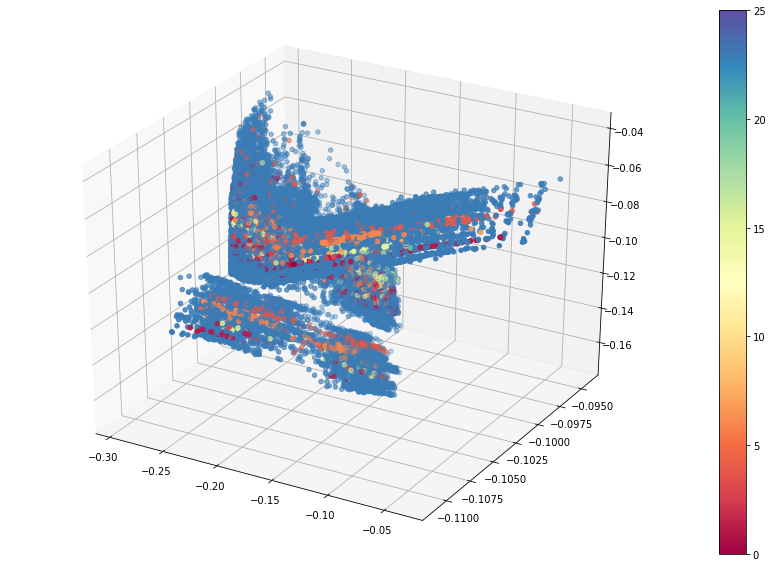

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
x_test_encoded = encoder.predict(X_test)
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
#p = ax.scatter3D(np.array(x_test_encoded)[:][0], np.array(x_test_encoded)[:][1],cmap='Spectral',c = y_test.values)
#p1 = ax.scatter3D(lst1_0, lst1_1,lst1_2,cmap='Spectral',c = y_test.values)
p2 = ax.scatter3D(lst2_0, lst2_1,lst2_2,cmap='Spectral',c = y_test.values)
#p3 = ax.scatter3D(lst3_0, lst3_1,lst3_2,cmap='Spectral',c = y_test.values)
cbar = fig.colorbar(p1)
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/VAE - Latent Space.jpeg',dpi=500)
plt.show()

In [ ]:
lst1 = [(item[0]+item[1]+item[2]+item[3])/4 for item in x_test_encoded[:][0]]
lst2 = [(item[0]+item[1]+item[2]+item[3])/4 for item in x_test_encoded[:][1]]
lst3 = [(item[0]+item[1]+item[2]+item[3])/4 for item in x_test_encoded[:][2]]
len(lst2)

63039

In [ ]:
lst1_0 = [item[0] for item in x_test_encoded[:][0]]
lst1_1 = [item[1] for item in x_test_encoded[:][0]]
lst1_2 = [item[2] for item in x_test_encoded[:][0]]
lst1_3 = [item[3] for item in x_test_encoded[:][0]]  
lst2_0 = [item[0] for item in x_test_encoded[:][1]]
lst2_1 = [item[1] for item in x_test_encoded[:][1]]
lst2_2 = [item[2] for item in x_test_encoded[:][1]]
lst2_3 = [item[3] for item in x_test_encoded[:][1]]  
lst3_0 = [item[0] for item in x_test_encoded[:][2]]
lst3_1 = [item[1] for item in x_test_encoded[:][2]]
lst3_2 = [item[2] for item in x_test_encoded[:][2]]
lst3_3 = [item[3] for item in x_test_encoded[:][2]]           
'''lst2 = [(item[0]+item[1]+item[2]+item[3])/4 for item in x_test_encoded[:][1]]
lst3 = [(item[0]+item[1]+item[2]+item[3])/4 for item in x_test_encoded[:][2]]'''
len(lst2)

63039

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)

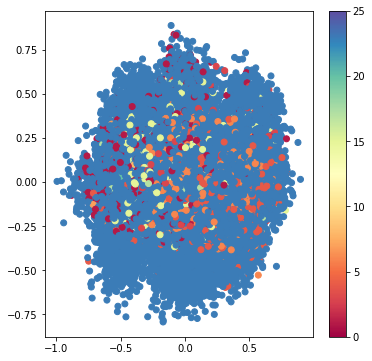

In [ ]:
x_test_encoded = encoder.predict(X_test, batch_size=BATCH_SIZE)
plt.figure(figsize=(6, 6))
#plt.scatter(np.array(x_test_encoded)[:][0], np.array(x_test_encoded)[:][1])
'''plt.scatter(lst1_0, lst1_1,cmap='Spectral',c = y_test.values)
plt.scatter(lst1_2, lst1_3,cmap='Spectral',c = y_test.values)
plt.scatter(lst2_0, lst2_1,cmap='Spectral',c = y_test.values)
plt.scatter(lst2_2, lst2_3,cmap='Spectral',c = y_test.values)'''
plt.scatter(lst3_0, lst3_1,cmap='Spectral',c = y_test.values)
plt.scatter(lst3_2, lst3_3,cmap='Spectral',c = y_test.values)
plt.colorbar()
plt.show()

In [ ]:
(np.array(x_test_encoded)[:][0][0])

array([-0.02636209,  0.22246319, -0.38143912,  0.00352776], dtype=float32)

In [ ]:
y = pd.DataFrame(y)
y.reset_index(inplace=True, drop=True)
X.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252155
63039
252155
63039


In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [ ]:
y = pd.DataFrame(y)
y.reset_index(inplace=True, drop=True)
X.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252155
63039
252155
63039


In [ ]:
x_test_encoded = autoencoder.predict(X_test, batch_size=BATCH_SIZE)
lst1_0 = [item[0] for item in x_test_encoded[:][0]]
lst1_1 = [item[1] for item in x_test_encoded[:][0]]
lst1_2 = [item[2] for item in x_test_encoded[:][0]]
lst1_3 = [item[3] for item in x_test_encoded[:][0]]  
lst2_0 = [item[0] for item in x_test_encoded[:][1]]
lst2_1 = [item[1] for item in x_test_encoded[:][1]]
lst2_2 = [item[2] for item in x_test_encoded[:][1]]
lst2_3 = [item[3] for item in x_test_encoded[:][1]]  
lst3_0 = [item[0] for item in x_test_encoded[:][2]]
lst3_1 = [item[1] for item in x_test_encoded[:][2]]
lst3_2 = [item[2] for item in x_test_encoded[:][2]]
lst3_3 = [item[3] for item in x_test_encoded[:][2]] 

IndexError: ignored

In [ ]:
x_test_encoded[:][0]

array([9.5953894e-01, 8.8052161e-02, 3.7607390e-01, 3.1164976e-02,
       7.4387941e-04, 7.2332360e-02, 8.4643942e-01, 7.8037739e-01],
      dtype=float32)

In [ ]:
plt.figure(figsize=(6, 6))
#plt.scatter(np.array(x_test_encoded)[:][0], np.array(x_test_encoded)[:][1])
'''plt.scatter(lst1_0, lst1_1,cmap='Spectral',c = y_test.values)
plt.scatter(lst1_2, lst1_3,cmap='Spectral',c = y_test.values)
plt.scatter(lst2_0, lst2_1,cmap='Spectral',c = y_test.values)
plt.scatter(lst2_2, lst2_3,cmap='Spectral',c = y_test.values)'''
plt.scatter(lst3_0, lst3_1,cmap='Spectral',c = y_test.values)
plt.scatter(lst3_2, lst3_3,cmap='Spectral',c = y_test.values)
plt.colorbar()
plt.show()

In [ ]:
print(np.round(autoencoder_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(autoencoder_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(autoencoder_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
autoencoder_pred = pd.DataFrame(autoencoder_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [ ]:
autoencoder_pred["label"] = y_test.values
autoencoder_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_pred.csv')

In [ ]:
autoencoder_pred

In [ ]:
y_white = pd.DataFrame(y_white)
y_white.reset_index(inplace=True, drop=True)
X_white.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white , test_size = 0.2, random_state = 2020, stratify=y_white, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
X_white.shape[-1] 

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [ ]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
white_pred = autoencoder.predict(X_test)

In [ ]:
white_pred

In [ ]:
print(np.round(white_pred[128],2))
print(np.round(np.array(X_test.iloc[128]),2))
print()
print(np.round(white_pred[1001],2))
print(np.round(np.array(X_test.iloc[1001]),2))
print()
print(np.round(white_pred[4978],2))
print(np.round(np.array(X_test.iloc[4978]),2))

In [ ]:
white_pred = pd.DataFrame(white_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [ ]:
white_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_white_pred.csv')

In [ ]:
y_paduaCryptoWall = pd.DataFrame(y_paduaCryptoWall)
y_paduaCryptoWall.reset_index(inplace=True, drop=True)
X_paduaCryptoWall.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_paduaCryptoWall, y_paduaCryptoWall , test_size = 0.2, random_state = 2020, stratify=y_paduaCryptoWall, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
X_paduaCryptoWall.shape[-1] 

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [ ]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
paduaCryptoWall_pred = autoencoder.predict(X_test)
paduaCryptoWall_pred

In [ ]:
print(np.round(paduaCryptoWall_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(paduaCryptoWall_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(paduaCryptoWall_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
paduaCryptoWall_pred = pd.DataFrame(paduaCryptoWall_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [ ]:
paduaCryptoWall_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_paduaCryptoWall_pred.csv')

In [ ]:
y_montrealCryptoLocker = pd.DataFrame(montrealCryptoLocker)
y_montrealCryptoLocker.reset_index(inplace=True, drop=True)
X_montrealCryptoLocker.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_montrealCryptoLocker, y_montrealCryptoLocker , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
X_montrealCryptoLocker.shape[-1] 

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [ ]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
montrealCryptoLocker_pred = autoencoder.predict(X_test)
montrealCryptoLocker_pred

In [ ]:
print(np.round(montrealCryptoLocker_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(montrealCryptoLocker_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(montrealCryptoLocker_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
montrealCryptoLocker_pred = pd.DataFrame(montrealCryptoLocker_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [ ]:
montrealCryptoLocker_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_montrealCryptoLocker.csv')

In [ ]:
y_princetonCerber = pd.DataFrame(princetonCerber)
y_princetonCerber.reset_index(inplace=True, drop=True)
X_princetonCerber.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_princetonCerber, y_princetonCerber , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
X_princetonCerber.shape[-1] 

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [ ]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
princetonCerber_pred = autoencoder.predict(X_test)
princetonCerber_pred

In [ ]:
print(np.round(princetonCerber_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(princetonCerber_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(princetonCerber_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
princetonCerber_pred = pd.DataFrame(princetonCerber_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [ ]:
princetonCerber_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_princetonCerber_pred.csv')

In [ ]:
y_princetonLocky = pd.DataFrame(y_princetonLocky)
y_princetonLocky.reset_index(inplace=True, drop=True)
X_princetonLocky.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_princetonLocky, y_princetonLocky , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
#hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
#hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=20,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
princetonLocky_pred = autoencoder.predict(X_test)
princetonLocky_pred

In [ ]:
print(np.round(princetonLocky_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(princetonLocky_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(princetonLocky_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
princetonLocky_pred = pd.DataFrame(princetonLocky_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])

In [ ]:
princetonLocky_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_princetonLocky_pred.csv')

In [ ]:
y_montrealCryptXXX = pd.DataFrame(y_montrealCryptXXX)
y_montrealCryptXXX.reset_index(inplace=True, drop=True)
X_montrealCryptXXX.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_montrealCryptXXX, y_montrealCryptXXX , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 10

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
montrealCryptXXX_pred = autoencoder.predict(X_test)
montrealCryptXXX_pred

In [ ]:
print(np.round(montrealCryptXXX_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(montrealCryptXXX_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(montrealCryptXXX_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
montrealCryptXXX_pred = pd.DataFrame(montrealCryptXXX_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])

In [ ]:
montrealCryptXXX_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_montrealCryptXXX_pred.csv')

In [ ]:
y_montrealNoobCrypt = pd.DataFrame(y_montrealNoobCrypt)
y_montrealNoobCrypt.reset_index(inplace=True, drop=True)
X_montrealNoobCrypt.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_montrealNoobCrypt, y_montrealNoobCrypt , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
montrealNoobCrypt_pred = autoencoder.predict(X_test)
montrealNoobCrypt_pred

In [ ]:
print(np.round(montrealNoobCrypt_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(montrealNoobCrypt_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(montrealNoobCrypt_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
montrealNoobCrypt_pred = pd.DataFrame(montrealNoobCrypt_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])

In [ ]:
montrealNoobCrypt_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_montrealNoobCrypt_pred.csv')

In [ ]:
y_montrealDMALockerv3 = pd.DataFrame(y_montrealDMALockerv3)
y_montrealDMALockerv3.reset_index(inplace=True, drop=True)
X_montrealDMALockerv3.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_montrealDMALockerv3, y_montrealDMALockerv3 , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
montrealDMALockerv3_pred = autoencoder.predict(X_test)
montrealDMALockerv3_pred

In [ ]:
print(np.round(montrealDMALockerv3_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(montrealDMALockerv3_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(montrealDMALockerv3_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
montrealDMALockerv3_pred = pd.DataFrame(montrealDMALockerv3_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])

In [ ]:
montrealDMALockerv3_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_montrealDMALockerv3_pred.csv')

In [ ]:
y_montrealDMALocker = pd.DataFrame(y_montrealDMALocker)
y_montrealDMALocker.reset_index(inplace=True, drop=True)
X_montrealDMALocker.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_montrealDMALocker, y_montrealDMALocker , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
EPOCHS = 256
BATCH_SIZE = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
montrealDMALocker_pred = autoencoder.predict(X_test)

In [ ]:
print(np.round(montrealDMALocker_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(montrealDMALocker_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(montrealDMALocker_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

In [ ]:
montrealDMALocker_pred = pd.DataFrame(montrealDMALocker_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])

In [ ]:
montrealDMALocker_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_montrealDMALocker_pred.csv')

In [ ]:
y_montrealSamSam = pd.DataFrame(y_montrealSamSam)
y_montrealSamSam.reset_index(inplace=True, drop=True)
X_montrealSamSam.reset_index(inplace=True, drop=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_montrealSamSam, y_montrealSamSam , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

EPOCHS = 256
BATCH_SIZE = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
montrealSamSam_pred = autoencoder.predict(X_test)

In [ ]:
print(np.round(montrealSamSam_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
montrealSamSam_pred = pd.DataFrame(montrealSamSam_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])
montrealSamSam_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_montrealSamSam_pred.csv')

In [ ]:
y_montrealCryptoTorLocker2015 = pd.DataFrame(y_montrealCryptoTorLocker2015)
y_montrealCryptoTorLocker2015.reset_index(inplace=True, drop=True)
X_montrealCryptoTorLocker2015.reset_index(inplace=True, drop=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_montrealCryptoTorLocker2015, y_montrealCryptoTorLocker2015 , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

EPOCHS = 256
BATCH_SIZE = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
montrealCryptoTorLocker2015_pred = autoencoder.predict(X_test)

print(np.round(montrealCryptoTorLocker2015_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))

montrealCryptoTorLocker2015_pred = pd.DataFrame(montrealCryptoTorLocker2015_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])
montrealCryptoTorLocker2015_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_montrealCryptoTorLocker2015_pred.csv')

In [ ]:
y_paduaJigsaw = pd.DataFrame(y_paduaJigsaw)
y_paduaJigsaw.reset_index(inplace=True, drop=True)
X_paduaJigsaw.reset_index(inplace=True, drop=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_paduaJigsaw, y_paduaJigsaw , test_size = 0.2, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
#hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
#hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

EPOCHS = 2000
BATCH_SIZE = 1

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]

baseline_history = autoencoder.fit(
                            X_train,
                            X_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            #callbacks=callbacks,
                            validation_data=(X_test, X_test))

In [ ]:
paduaJigsaw_pred = autoencoder.predict(X_test)

'''print(np.round(montrealJigSaw_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print(np.round(montrealJigSaw_pred[1],2))
print(np.round(np.array(X_test.iloc[1]),2))'''
print(np.round(paduaJigsaw_pred[0],2))
print(np.round(np.array(X_test.iloc[0]),2))

paduaJigsaw_pred = pd.DataFrame(paduaJigsaw_pred, columns = ['year','day','length','weight','count','looped','neighbors','income'])
paduaJigsaw_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Auto Encoders/AE_paduaJigsaw_pred.csv')

In [ ]:
'''function ClickConnect(){
  console.log("C onnnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
setInterval(ClickConnect, 60000)'''